In [ ]:
!pip install ensmallen embiggen tensorflow plot_keras_history

In [3]:
!mkdir -p data && cd data && curl -LO 'https://storage.googleapis.com/ecokg/merged-kg.tar.gz' && tar zxf merged-kg.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  150M  100  150M    0     0   247M      0 --:--:-- --:--:-- --:--:--  247M


In [4]:
from ensmallen import Graph

g = Graph.from_csv(
    # node_type_path="data/merged-kg_nodes.tsv",
    # nodes_column="id",
    # node_list_header=True,
    # node_list_separator="\t",

    edge_path="data/merged-kg_edges.tsv",
    sources_column="subject",
    destinations_column="object",
    edge_list_header=True,
    edge_list_separator="\t",

    directed=False, # FIXME: it's directed, but compute_node_embedding() (below) isn't compatible with directed graphs...?

    # probably some other arguments too, see here:
    # https://github.com/AnacletoLAB/grape/blob/main/tutorials/Loading_a_Graph_in_Ensmallen.ipynb
    # under "manually load a graph"
)

g # make sure graph looks okay

<p>The undirected graph has 427657 nodes and 5379922 edges.</p><h3>RAM requirements</h3><p>The RAM requirements for the nodes and edges data structures are 81.83MB and 22.08MB respectively.</p><h3>Degree centrality</h3><p>The minimum node degree is 1, the maximum node degree is 99804, the mode degree is 2, the mean degree is 25.16 and the node degree median is 6.</p><p>The nodes with highest degree centrality are: TO:0000427 (degree 99804), TO:0000055 (degree 99707), TO:0000299 (degree 99457), TO:0000051 (degree 99415) and TO:0000140 (degree 98608).</p><h3>Disconnected nodes</h3><p>Disconnected nodes are nodes that are not connected to any other node.The graph contains 1 disconnected nodes.</p><h4>Singleton nodes with selfloops</h4><p>Singleton nodes with selfloops are nodes with no edge to other nodes and have exclusively selfloops. The graph contains a singleton node with selfloop, which is <a href='http://www.w3.org/2002/07/owl#Nothing' target='_blank' title='Go to OWL to get more informations about owl:Nothing'>owl:Nothing</a> (degree 1).</p>

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


0epoch [00:00, ?epoch/s]

INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f83507649d0>,
       dtype=object))

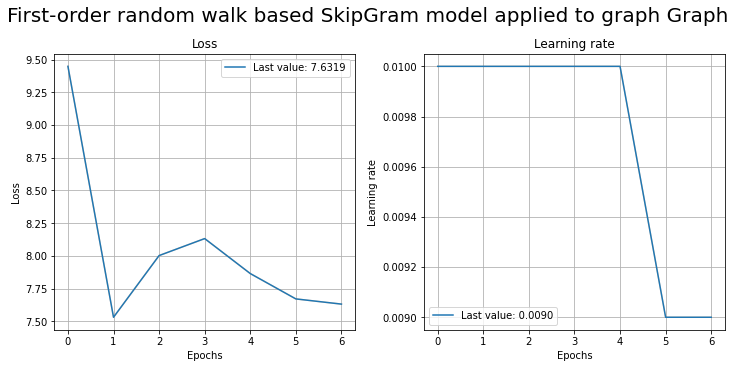

In [5]:
from embiggen.pipelines import compute_node_embedding
from plot_keras_history import plot_history

node_embedding_method_name = "SkipGram"

first_order_rw_node_embedding, training_history = compute_node_embedding(
    g,
    node_embedding_method_name=node_embedding_method_name,
)

# need to use a GPU here
plot_history(
    training_history,
    title="First-order random walk based {} model applied to graph {}".format(
        node_embedding_method_name,
        g.get_name()
    )
)

In [6]:
!du -sh ./node_embeddings/*

152M	./node_embeddings/SkipGram


In [7]:
!tar czf node-embeddings.tar.gz ./node_embeddings/*

In [8]:
!du -sh *

885M	data
152M	node_embeddings
152M	node-embeddings.tar.gz
55M	sample_data
